# Azure Computer Vision 4 (Florence)

## Image Analysis with Azure Computer Vision 4

![Image](florence.jpg)

The **Computer Vision Image Analysis** service can extract a wide variety of visual features from your images. For example, it can determine whether an image contains adult content, find specific brands or objects, or find human faces.

The latest version of Image Analysis, 4.0, which is now in public preview, has new features like synchronous OCR and people detection. We recommend you use this version going forward.

You can use Image Analysis through a client library SDK or by calling the REST API directly. Follow the quickstart to get started.

https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/overview-image-analysis?tabs=4-0

Azure Computer Vision updates:
https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/whats-new#march-2023
<br><br>
> Serge Retkowsky | Microsoft | https://github.com/retkowsky | 3rd of May, 2023

In [2]:
import os
import requests
import sys

from dotenv import load_dotenv
from PIL import Image
from pprintjson import pprintjson

In [3]:
sys.version

'3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]'

## Azure Computer Vision 4

In [4]:
load_dotenv("azure.env")

key = os.getenv("azure_cv_key")
endpoint = os.getenv("azure_cv_endpoint")

In [7]:
options = "&features=tags,objects,caption,read,smartCrops,denseCaptions,people"
model = "?api-version=2023-02-01-preview&modelVersion=latest"

url = endpoint + "/computervision/imageanalysis:analyze" + model + options

headers = {"Content-type": "application/octet-stream", "Ocp-Apim-Subscription-Key": key}

## Images

In [8]:
IMAGES_DIR = "images"

image_extensions = (".jpg", ".jpeg", ".png", ".gif")
image_files = [f for f in os.listdir(IMAGES_DIR) if f.endswith(image_extensions)]
image_files

['arc_triomphe.jpg',
 'businesscard.jpg',
 'car.jpg',
 'car.png',
 'car2.jpg',
 'cars.jpg',
 'cat.jpg',
 'drinks.jpg',
 'fashionprocess.png',
 'fruits.jpg',
 'image1.jpg',
 'office.jpg',
 'postalcard.jpg',
 'presentation.png',
 'sand.jpg',
 'street.jpg',
 'tomato.jpg',
 'whitecar.jpg']

## Test 1

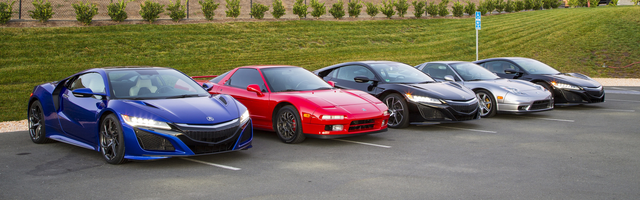

In [14]:
image_file = os.path.join(IMAGES_DIR, "cars.jpg")

img = Image.open(image_file)
img.thumbnail((640, 640), Image.LANCZOS)
img.convert("RGB")

In [15]:
#below is the code to send the image to the API - the image is read as a binary file and sent as the data parameter in the post request
with open(image_file, "rb") as f:
    data = f.read()
#r is the response object from the API call 
r = requests.post(url, data=data, headers=headers)
#results is the json object returned from the API call
results = r.json()
pprintjson(results)


{
    "captionResult": {
        "text": "a group of cars parked in a parking lot",
        "confidence": 1.0
    },
    "objectsResult": {
        "values": [
            {
                "boundingBox": {
                    "x": 1819,
                    "y": 374,
                    "w": 1112,
                    "h": 378
                },
                "tags": [
                    {
                        "name": "race car",
                        "confidence": 0.791
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 2456,
                    "y": 356,
                    "w": 999,
                    "h": 305
                },
                "tags": [
                    {
                        "name": "race car",
                        "confidence": 0.708
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 154,
        

In [16]:
pprintjson(results)

{
    "captionResult": {
        "text": "a group of cars parked in a parking lot",
        "confidence": 1.0
    },
    "objectsResult": {
        "values": [
            {
                "boundingBox": {
                    "x": 1819,
                    "y": 374,
                    "w": 1112,
                    "h": 378
                },
                "tags": [
                    {
                        "name": "race car",
                        "confidence": 0.791
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 2456,
                    "y": 356,
                    "w": 999,
                    "h": 305
                },
                "tags": [
                    {
                        "name": "race car",
                        "confidence": 0.708
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 154,
        

In [17]:
pprintjson(results["modelVersion"])

"2023-02-01-preview"


In [18]:
pprintjson(results["metadata"])

{
    "width": 3840,
    "height": 1200
}


In [19]:
pprintjson(results["captionResult"])

{
    "text": "a group of cars parked in a parking lot",
    "confidence": 1.0
}


In [20]:
pprintjson(results["objectsResult"])

{
    "values": [
        {
            "boundingBox": {
                "x": 1819,
                "y": 374,
                "w": 1112,
                "h": 378
            },
            "tags": [
                {
                    "name": "race car",
                    "confidence": 0.791
                }
            ]
        },
        {
            "boundingBox": {
                "x": 2456,
                "y": 356,
                "w": 999,
                "h": 305
            },
            "tags": [
                {
                    "name": "race car",
                    "confidence": 0.708
                }
            ]
        },
        {
            "boundingBox": {
                "x": 154,
                "y": 377,
                "w": 1351,
                "h": 613
            },
            "tags": [
                {
                    "name": "car",
                    "confidence": 0.905
                }
            ]
        },
        {
            "

In [21]:
pprintjson(results["denseCaptionsResult"])

{
    "values": [
        {
            "text": "a group of cars parked in a parking lot",
            "confidence": 1.0,
            "boundingBox": {
                "x": 0,
                "y": 0,
                "w": 3840,
                "h": 1200
            }
        },
        {
            "text": "a blue sports car parked on the side of a road",
            "confidence": 1.0,
            "boundingBox": {
                "x": 126,
                "y": 355,
                "w": 1378,
                "h": 617
            }
        },
        {
            "text": "a red sports car parked next to a blue car",
            "confidence": 1.0,
            "boundingBox": {
                "x": 1144,
                "y": 354,
                "w": 1176,
                "h": 491
            }
        },
        {
            "text": "a black sports car parked next to a red sports car",
            "confidence": 1.0,
            "boundingBox": {
                "x": 1857,
                "

In [61]:
pprintjson(results["tagsResult"])

{
    "values": [
        {
            "name": "tin can",
            "confidence": 0.9846200942993164
        },
        {
            "name": "aluminum can",
            "confidence": 0.9741357564926147
        },
        {
            "name": "beverage can",
            "confidence": 0.9658339023590088
        },
        {
            "name": "soft drink",
            "confidence": 0.9645965099334717
        },
        {
            "name": "food",
            "confidence": 0.9587128162384033
        },
        {
            "name": "beverage",
            "confidence": 0.958613395690918
        },
        {
            "name": "carbonated soft drinks",
            "confidence": 0.9491918683052063
        },
        {
            "name": "drink",
            "confidence": 0.9241653680801392
        },
        {
            "name": "cola",
            "confidence": 0.9140154123306274
        },
        {
            "name": "tin",
            "confidence": 0.9056470990180969
       

In [23]:
pprintjson(results["readResult"])

{
    "stringIndexType": "TextElements",
    "content": "",
    "pages": [
        {
            "height": 1200.0,
            "width": 3840.0,
            "angle": 0.0,
            "pageNumber": 1,
            "words": [],
            "spans": [
                {
                    "offset": 0,
                    "length": 0
                }
            ],
            "lines": []
        }
    ],
    "styles": [],
    "modelVersion": "2022-04-30"
}


In [34]:
pprintjson(results["readResult"]["content"])

""


In [53]:
pprintjson(results["smartCropsResult"])

{
    "values": [
        {
            "aspectRatio": 0.54,
            "boundingBox": {
                "x": 35,
                "y": 21,
                "w": 231,
                "h": 430
            }
        }
    ]
}


In [52]:
pprintjson(results["peopleResult"])

{
    "values": [
        {
            "boundingBox": {
                "x": 0,
                "y": 58,
                "w": 277,
                "h": 456
            },
            "confidence": 0.9671448469161987
        },
        {
            "boundingBox": {
                "x": 21,
                "y": 220,
                "w": 240,
                "h": 150
            },
            "confidence": 0.004723977763205767
        }
    ]
}


## Test 2

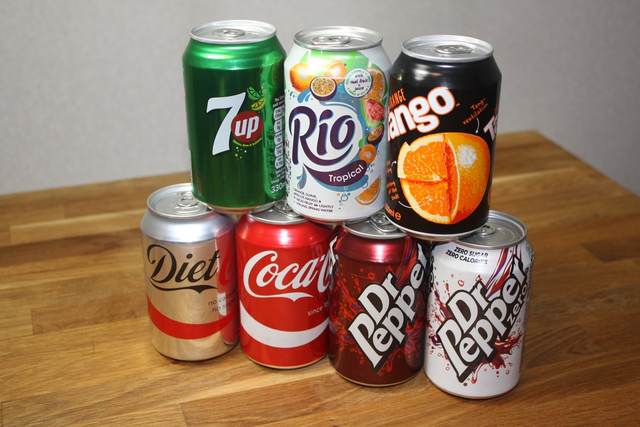

In [58]:
image_file = os.path.join(IMAGES_DIR, "drinks.jpg")

img = Image.open(image_file)
img.thumbnail((640, 640), Image.LANCZOS)
img

In [60]:
with open(image_file, "rb") as f:
    data = f.read()

r = requests.post(url, data=data, headers=headers)

results = r.json()
pprintjson(results)

{
    "captionResult": {
        "text": "a group of cans stacked on top of each other",
        "confidence": 1.0
    },
    "objectsResult": {
        "values": [
            {
                "boundingBox": {
                    "x": 437,
                    "y": 49,
                    "w": 224,
                    "h": 468
                },
                "tags": [
                    {
                        "name": "Tin can",
                        "confidence": 0.654
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 660,
                    "y": 64,
                    "w": 262,
                    "h": 465
                },
                "tags": [
                    {
                        "name": "Tin can",
                        "confidence": 0.676
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 903,
          

In [51]:
print(results["readResult"]["content"])

## Test 3

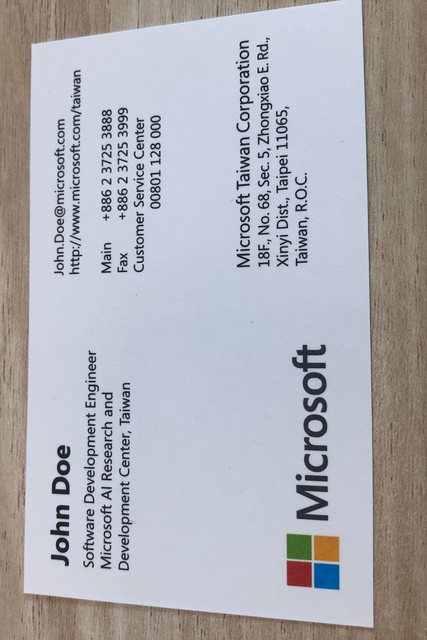

In [36]:
image_file = os.path.join(IMAGES_DIR, "businesscard.jpg")

img = Image.open(image_file)
img.thumbnail((640, 640), Image.LANCZOS)
img

In [37]:
with open(image_file, "rb") as f:
    data = f.read()

r = requests.post(url, data=data, headers=headers)

results = r.json()
pprintjson(results)

{
    "captionResult": {
        "text": "a business card on a table",
        "confidence": 1.0
    },
    "objectsResult": {
        "values": []
    },
    "readResult": {
        "stringIndexType": "TextElements",
        "content": "John Doe\nJohn.Doe@microsoft.com\nhttp://www.microsoft.com/taiwan\nSoftware Development Engineer\nMicrosoft Al Research and\nMain\n+886 2 3725 3888\nDevelopment Center, Taiwan\nFax\n+886 2 3725 3999\nCustomer Service Center\n00801 128 000\nMicrosoft Taiwan Corporation\n18F ., No. 68, Sec. 5, Zhongxiao E. Rd .,\nXinyi Dist ., Taipei 11065,\nMicrosoft\nTaiwan, R.O.C.",
        "pages": [
            {
                "height": 1632.0,
                "width": 2448.0,
                "angle": 0.1305,
                "pageNumber": 1,
                "words": [
                    {
                        "content": "John",
                        "boundingBox": [
                            280.0,
                            186.0,
                       

In [38]:
print(results["readResult"]["content"])

John Doe
John.Doe@microsoft.com
http://www.microsoft.com/taiwan
Software Development Engineer
Microsoft Al Research and
Main
+886 2 3725 3888
Development Center, Taiwan
Fax
+886 2 3725 3999
Customer Service Center
00801 128 000
Microsoft Taiwan Corporation
18F ., No. 68, Sec. 5, Zhongxiao E. Rd .,
Xinyi Dist ., Taipei 11065,
Microsoft
Taiwan, R.O.C.


## Test 4

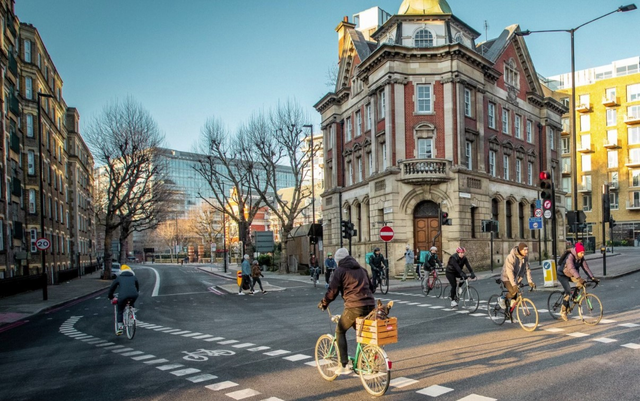

In [40]:
image_file = os.path.join(IMAGES_DIR, "street.jpg")

img = Image.open(image_file)
img.thumbnail((640, 640), Image.LANCZOS)
img

In [41]:
with open(image_file, "rb") as f:
    data = f.read()

r = requests.post(url, data=data, headers=headers)

results = r.json()
pprintjson(results)

{
    "captionResult": {
        "text": "a group of people riding bicycles in a city",
        "confidence": 1.0
    },
    "objectsResult": {
        "values": [
            {
                "boundingBox": {
                    "x": 941,
                    "y": 466,
                    "w": 64,
                    "h": 138
                },
                "tags": [
                    {
                        "name": "person",
                        "confidence": 0.622
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 1053,
                    "y": 466,
                    "w": 70,
                    "h": 127
                },
                "tags": [
                    {
                        "name": "person",
                        "confidence": 0.555
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 598,
            

In [44]:
pprintjson(results["captionResult"])

{
    "text": "a group of people riding bicycles in a city",
    "confidence": 1.0
}


In [45]:
pprintjson(results["objectsResult"])

{
    "values": [
        {
            "boundingBox": {
                "x": 941,
                "y": 466,
                "w": 64,
                "h": 138
            },
            "tags": [
                {
                    "name": "person",
                    "confidence": 0.622
                }
            ]
        },
        {
            "boundingBox": {
                "x": 1053,
                "y": 466,
                "w": 70,
                "h": 127
            },
            "tags": [
                {
                    "name": "person",
                    "confidence": 0.555
                }
            ]
        },
        {
            "boundingBox": {
                "x": 598,
                "y": 628,
                "w": 46,
                "h": 92
            },
            "tags": [
                {
                    "name": "Bicycle wheel",
                    "confidence": 0.531
                }
            ]
        },
        {
            "b

In [46]:
pprintjson(results["denseCaptionsResult"])

{
    "values": [
        {
            "text": "a group of people riding bicycles in a city",
            "confidence": 1.0,
            "boundingBox": {
                "x": 0,
                "y": 0,
                "w": 1206,
                "h": 756
            }
        },
        {
            "text": "a person riding a bicycle with a basket of dog",
            "confidence": 1.0,
            "boundingBox": {
                "x": 584,
                "y": 459,
                "w": 154,
                "h": 283
            }
        },
        {
            "text": "a person riding a bike",
            "confidence": 1.0,
            "boundingBox": {
                "x": 1029,
                "y": 449,
                "w": 105,
                "h": 161
            }
        },
        {
            "text": "a person riding a bike",
            "confidence": 1.0,
            "boundingBox": {
                "x": 833,
                "y": 458,
                "w": 64,
              

In [47]:
pprintjson(results["tagsResult"])

{
    "values": [
        {
            "name": "outdoor",
            "confidence": 0.9991688132286072
        },
        {
            "name": "building",
            "confidence": 0.9910473823547363
        },
        {
            "name": "road",
            "confidence": 0.9782278537750244
        },
        {
            "name": "sky",
            "confidence": 0.9767833352088928
        },
        {
            "name": "street",
            "confidence": 0.9664870500564575
        },
        {
            "name": "bicycle wheel",
            "confidence": 0.9168410301208496
        },
        {
            "name": "land vehicle",
            "confidence": 0.9047801494598389
        },
        {
            "name": "vehicle",
            "confidence": 0.8851263523101807
        },
        {
            "name": "pedestrian",
            "confidence": 0.8809370994567871
        },
        {
            "name": "town",
            "confidence": 0.8585145473480225
        },
        

In [48]:
pprintjson(results["peopleResult"])

{
    "values": [
        {
            "boundingBox": {
                "x": 599,
                "y": 464,
                "w": 112,
                "h": 242
            },
            "confidence": 0.888308048248291
        },
        {
            "boundingBox": {
                "x": 202,
                "y": 495,
                "w": 62,
                "h": 135
            },
            "confidence": 0.8724349737167358
        },
        {
            "boundingBox": {
                "x": 838,
                "y": 463,
                "w": 60,
                "h": 115
            },
            "confidence": 0.8654031157493591
        },
        {
            "boundingBox": {
                "x": 939,
                "y": 454,
                "w": 71,
                "h": 153
            },
            "confidence": 0.861977756023407
        },
        {
            "boundingBox": {
                "x": 1046,
                "y": 453,
                "w": 81,
                "h